In [1]:
pacman::p_load(tidyverse, tm, stringr,NLP, RColorBrewer, wordcloud, Matrix, recommenderlab, slam, data.table)

In [2]:
setwd('C:/Users/nchandra/OneDrive - National University of Singapore/CARecSys')

In [3]:
wine <- read.csv('./Data/wine-reviews/winemag-data-130k-v2.csv', na.strings = c("","NA"), stringsAsFactors = FALSE)

|colname|definition|
|:---|:---|
|country|The country that the wine is from
|description|---|
|designation|The vineyard within the winery where the grapes that made the wine are from|
|points|The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)|
|price|The cost for a bottle of the wine|
|province|The province or state that the wine is from|
|region_1|The wine growing area in a province or state (ie Napa)|
|region_2|Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank|
|taster_name|---|
|taster_twitter_handle|---|
|title|The title of the wine review, which often contains the vintage if you're interested in extracting that feature|
|variety|The type of grapes used to make the wine (ie Pinot Noir)|
|winery|The winery that made the wine|

In [4]:
head(wine,2)

X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",VulkÃ Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [5]:
str(wine)

'data.frame':	129971 obs. of  14 variables:
 $ X                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ country              : chr  "Italy" "Portugal" "US" "US" ...
 $ description          : chr  "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering un"| __truncated__ "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy r"| __truncated__ "Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp ac"| __truncated__ "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with note"| __truncated__ ...
 $ designation          : chr  "VulkÃ  Bianco" "Avidagos" NA "Reserve Late Harvest" ...
 $ points               : int  87 87 87 87 87 87 87 87 87 87 ...
 $ price                : num  NA 15 14 13 65 15 16 24 12 27 ...
 $ province             : chr  "Sicily & Sardinia" "Douro" "Oregon" 

In [6]:
summary(wine)

       X            country          description        designation       
 Min.   :     0   Length:129971      Length:129971      Length:129971     
 1st Qu.: 32493   Class :character   Class :character   Class :character  
 Median : 64985   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 64985                                                           
 3rd Qu.: 97478                                                           
 Max.   :129970                                                           
                                                                          
     points           price           province           region_1        
 Min.   : 80.00   Min.   :   4.00   Length:129971      Length:129971     
 1st Qu.: 86.00   1st Qu.:  17.00   Class :character   Class :character  
 Median : 88.00   Median :  25.00   Mode  :character   Mode  :character  
 Mean   : 88.45   Mean   :  35.36                                        
 3rd Qu.: 91.00   3rd Qu.:  42

In [82]:
wine <- select(wine, -c('X'))

In [97]:
dim(wine)

[1] 129971     13

In [99]:
# Remove duplicate records
wine_nodup <- distinct(wine)

In [100]:
dim(wine_nodup)

[1] 119988     13

Next check for missing values

In [101]:
wine_nodup[!complete.cases(wine_nodup),]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",VulkÃ Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
2,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NA,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
6,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,NA,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem
7,Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87,16,Sicily & Sardinia,Vittoria,NA,Kerin Oâ€™Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
8,France,"This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.",NA,87,24,Alsace,Alsace,NA,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),GewÃ¼rztraminer,Trimbach
9,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),GewÃ¼rztraminer,Heinz Eifel
10,France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87,27,Alsace,Alsace,NA,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace),Pinot Gris,Jean-Baptiste Adam


In [103]:
#percentage of rows with missing value
nrow(wine_nodup[!complete.cases(wine_nodup),])/nrow(wine_nodup)

[1] 0.8292079

In [104]:
# if we narrow down to check only completeness of "description, designation, taser_name, points, price, variety, country, province"
nrow(wine_nodup[complete.cases(wine_nodup[c('description','designation', 'taster_name', 'points', 'price','variety', 'country', 'province')]),])/nrow(wine_nodup)

[1] 0.5338034

In [105]:
# new dataframe after removing NAs from description, designation, taster_name, points, price, variety, country, province
wine_clean <- wine_nodup[complete.cases(wine_nodup[c('description','designation', 'taster_name', 'points', 'price','variety', 'country', 'province')]),]

In [106]:
# check number of duplicated records in wine_clean
sum(duplicated(wine_clean))

[1] 0

In [109]:
#percentage of data left after the preprocessing
nrow(wine_clean)/nrow(wine)

[1] 0.4928022

In [110]:
dim(wine_clean)

[1] 64050    13

In [111]:
# check any missing twitter handle
sum(is.na(wine_clean$taster_twitter_handle))

[1] 3490

In [95]:
wine_clean[is.na(wine_clean$taster_twitter_handle),]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
9,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),GewÃ¼rztraminer,Heinz Eifel
16,Germany,"Zesty orange peels and apple notes abound in this sprightly, mineral-toned Riesling. Off dry on the palate, yet racy and lean, it's a refreshing, easy quaffer with wide appeal.",Devon,87,24,Mosel,NA,NA,Anna Lee C. Iijima,NA,Richard BÃ¶cking 2013 Devon Riesling (Mosel),Riesling,Richard BÃ¶cking
21,US,"Ripe aromas of dark berries mingle with ample notes of black pepper, toasted vanilla and dusty tobacco. The palate is oak-driven in nature, but notes of tart red currant shine through, offering a bit of levity.",Vin de Maison,87,23,Virginia,Virginia,NA,Alexander Peartree,NA,QuiÃ©vremont 2012 Vin de Maison Red (Virginia),Red Blend,QuiÃ©vremont
86,Germany,"Pronounced dust, pollen and earth tones lend savoriness to this otherwise citrusy wine. Racy acidity and fresh tangerine and lemon flavors turn herbal on the finish. Drink now.",Undone Dry,86,10,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,P.J. Valckenberg 2015 Undone Dry Riesling (Rheinhessen),Riesling,P.J. Valckenberg
98,US,A wisp of bramble extends a savory tone from nose to finish on this otherwise bright bristling wine. Delicate honey tones register as off dry on the palate but balance neatly alongside flavors of freshly pressed apples and pears. The finish is marked by a touch of pencil lead. Drink now through 2020.,Ingle Vineyard,88,20,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NA,Heron Hill 2015 Ingle Vineyard Riesling (Finger Lakes),Riesling,Heron Hill
102,US,"Dusty mineral, smoke and struck flint lend a savory tone to this lean light-bodied Riesling. Off dry in style, the palate offers delicately concentrated flavors of red apple and nectarine off set by tangerine acidity. Drink now through 2021.",Red Oak Vineyard,87,20,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NA,Lamoreaux Landing 2014 Red Oak Vineyard Riesling (Finger Lakes),Riesling,Lamoreaux Landing
103,US,Intensely smoky tones of struck flint and ash extend throughout this otherwise bright nimble Riesling. The palate boasts freshly pressed apple and pear flavors accentuated by zippy lemon-lime acidity. Drink now through 2021.,Yellow Dog Vineyard,87,20,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NA,Lamoreaux Landing 2014 Yellow Dog Vineyard Riesling (Finger Lakes),Riesling,Lamoreaux Landing
149,Germany,"Crisp, pristine peach and apricot notes resonate through the nose and palate of this fresh, blossomy dry Riesling. While zesty and lithe in body, ripe grapefruit and melon flavors feel supple and silky on the palate. Drink now through 2019.",Dry,91,16,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Weingut Liebfrauenstift 2014 Dry Riesling (Rheinhessen),Riesling,Weingut Liebfrauenstift


In [112]:
# since some of the twitter_handle may be missing, taster_name will be used as user identifier
sum(is.na(wine_clean$taster_name))

[1] 0

In [118]:
#check missing product title after clean up
sum(is.null(wine_clean$title))

[1] 0

In [114]:
#check missing rating
sum(is.na(wine_clean$points))

[1] 0

In [115]:
# check missing price
sum(is.na(wine_clean$price))

[1] 0

In [119]:
sum(!complete.cases(wine_clean$designation))

[1] 0

In [120]:
#convert data type
wine_clean <- wine_clean %>%
    #convert taster_twitter_handle and taster_name to factor
    mutate(taster_twitter_handle = as.factor(taster_twitter_handle)) %>%
    mutate(taster_name = as.factor(taster_name)) %>%
    #convert variety and winery to factor
    mutate(variety = as.factor(variety)) %>%
    mutate(winery = as.factor(winery)) %>%
    #convert country as factor
    mutate(country = as.factor(country))

In [121]:
head(wine_clean)

country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>
Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,NA,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem
Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87,16,Sicily & Sardinia,Vittoria,NA,Kerin Oâ€™Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),GewÃ¼rztraminer,Heinz Eifel


'title' is product name, 'points' = the reviewer's rating, 'taster_name' as user identifier, 'variety' as wine group

In [123]:
# assign tasterID and wineID as unique identifier
wine_clean <- wine_clean %>%
    mutate(tasterID = group_indices(.,taster_name), wineID = group_indices(.,title))

**Count of reviews each taster**

In [124]:
wine_clean %>%
    group_by(taster_name) %>%
    summarize(count = n()) %>%
    arrange(-count)

taster_name,count
<fct>,<int>
Roger Voss,13216
Michael Schachner,11209
Kerin Oâ€™Keefe,6253
Virginie Boone,6158
Paul Gregutt,6026
Matt Kettmann,4099
Sean P. Sullivan,3159
Anna Lee C. Iijima,3147
Joe Czerwinski,3106


**Review Count for each Variety**

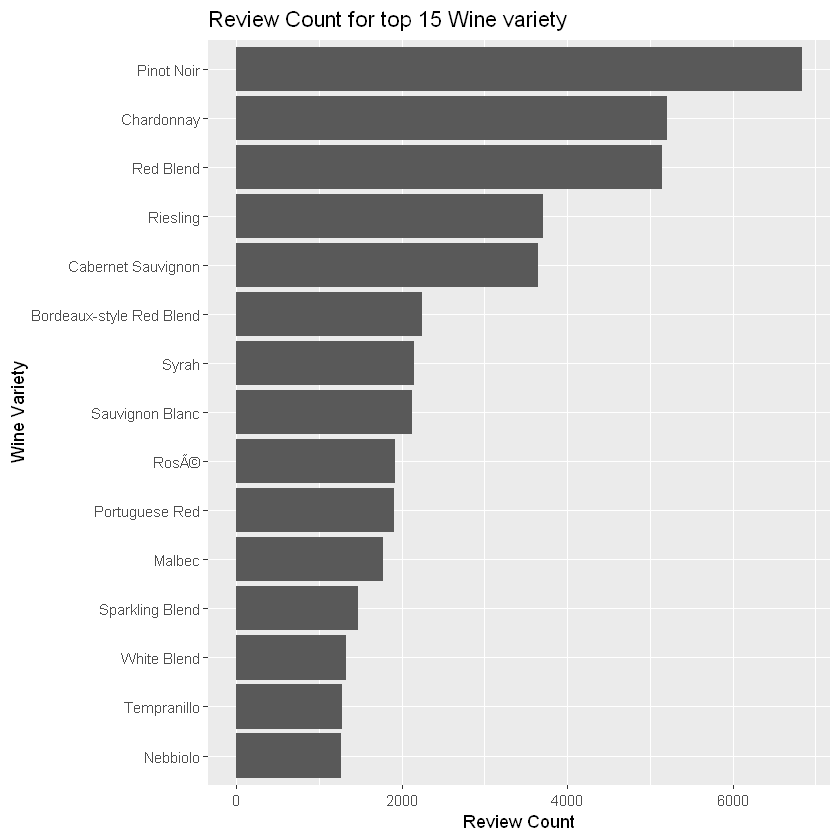

In [136]:
wine_clean %>%
    group_by(variety) %>%
    summarize(rev_count = n()) %>%
    arrange(-rev_count) %>%
    head(15) %>%
    ggplot(aes(x = reorder(as.factor(variety),rev_count), y = rev_count)) + geom_bar(stat = 'identity') + coord_flip() +
    labs(x = 'Wine Variety', 
         y = 'Review Count', 
         title = "Review Count for top 15 Wine variety")

In [140]:
# get mean point for each product
mean_score <- ungroup(wine_clean) %>%
    group_by(title) %>%
    summarize(mean_points = mean(points)) %>%
    arrange(desc(mean_points))

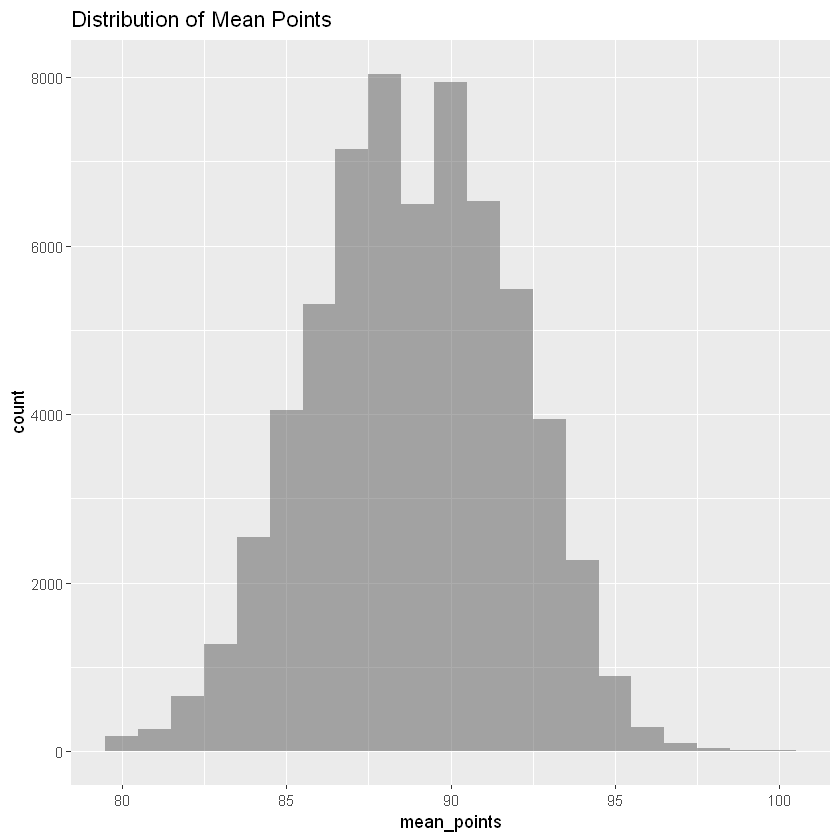

In [148]:
ggplot(mean_score, aes(mean_points)) + geom_histogram(binwidth = 1, alpha = 0.5, position = 'identity') +
labs(title = 'Distribution of Mean Points')

In [149]:
wine_clean %>%
    group_by(variety) %>%
    summarize(mean_points = mean(points), median_points = median(points), max_points = max(points))

variety,mean_points,median_points,max_points
<fct>,<dbl>,<dbl>,<int>
Ã‡alkarasÄ±,86.50000,86.5,87
Abouriou,86.00000,86.0,87
Agiorgitiko,87.22222,87.5,91
Aglianico,90.02632,90.0,97
Aidani,82.00000,82.0,82
Airen,81.00000,81.0,82
Albana,89.46154,89.0,94
Albanello,86.00000,86.0,86
AlbariÃ±o,87.68306,88.0,93


In [150]:
# number of unique product
print(paste('Number of wine product:',length(unique(wine_clean$title))))

[1] "Number of wine product: 63452"


In [151]:
#number of unique designation
print(paste('Number of wine variety:',length(unique(wine_clean$variety))))

[1] "Number of wine variety: 598"


In [152]:
head(wine_clean, 3)

country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,tasterID,wineID
<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<int>,<int>
Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,16,47571
US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,1,53884
US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,15,54762


In [153]:
# check the wineID against unique number of title
max(wine_clean$wineID) == length(unique(wine_clean$title))

[1] TRUE

In [154]:
# check the userID against unique number of taster_name
max(wine_clean$tasterID) == length(unique(wine_clean$taster_name))

[1] TRUE

In [155]:
print(paste('Number of wine reviewer:', length(unique(wine_clean$taster_name)), ', for', length(unique(wine_clean$title)), 'wine products'))

[1] "Number of wine reviewer: 19 , for 63452 wine products"


In [156]:
#taster
taster <- wine_clean %>%
    group_by(tasterID, taster_name) %>%
    summarize(Rcount = n(), maxpoint = max(points), minpoint = min(points), average = mean(points))


In [157]:
# top 3 tasters by review count
head(taster[order(-taster$Rcount),],3)

tasterID,taster_name,Rcount,maxpoint,minpoint,average
<int>,<fct>,<int>,<int>,<int>,<dbl>
16,Roger Voss,13216,100,80,88.83422
13,Michael Schachner,11209,98,80,87.08573
10,Kerin Oâ€™Keefe,6253,100,80,89.12954


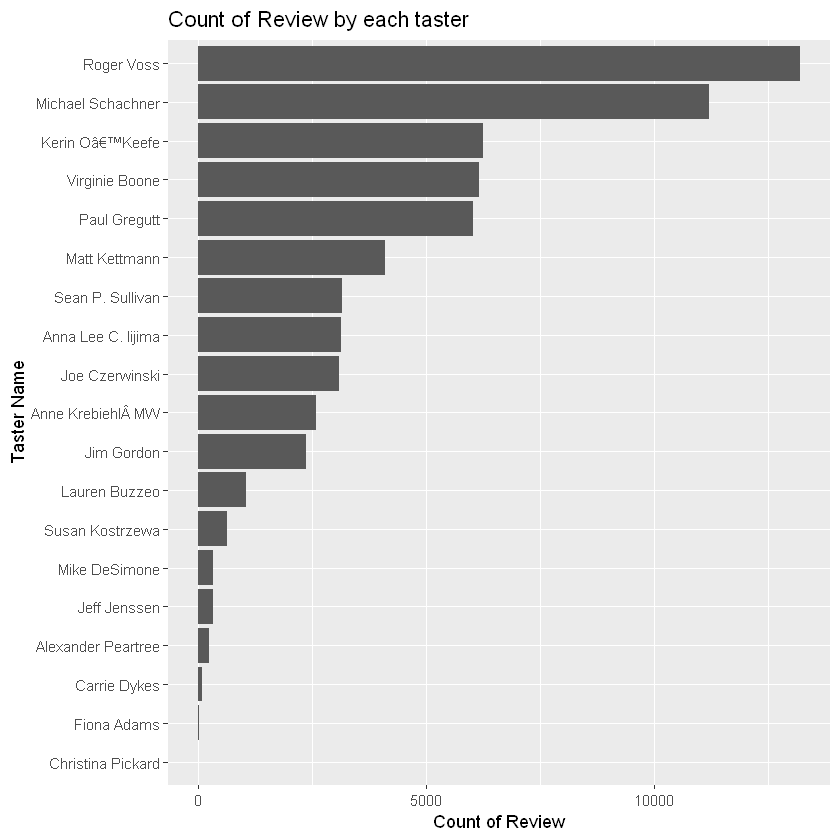

In [158]:
ggplot(taster, aes(x = reorder(as.factor(taster_name),Rcount), y = Rcount)) + 
geom_bar(stat = 'identity') +
labs(x = "Taster Name", y = 'Count of Review', title = 'Count of Review by each taster') + 
coord_flip()

In [159]:
#wine
wineprod <- wine_clean %>%
    group_by(wineID, title) %>%
    summarize(Rcount = n(), maxpoint = max(points), minpoints = min(points), average = mean(points)) %>%
    arrange(desc(Rcount))


In [160]:
#top 5 most reviewed wine
head(wineprod[order(-wineprod$Rcount, -wineprod$average),], 5)

wineID,title,Rcount,maxpoint,minpoints,average
<int>,<chr>,<int>,<int>,<int>,<dbl>
51944,Segura Viudas NV Extra Dry Sparkling (Cava),7,87,83,85.57143
51939,Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava),7,88,81,84.14286
3795,Bailly-Lapierre NV Brut (CrÃ©mant de Bourgogne),6,91,90,90.33333
50062,Ruinart NV Brut RosÃ© (Champagne),6,91,87,89.83333
51947,Segura Viudas NV Reserva Heredad Sparkling (Cava),5,89,84,87.20000


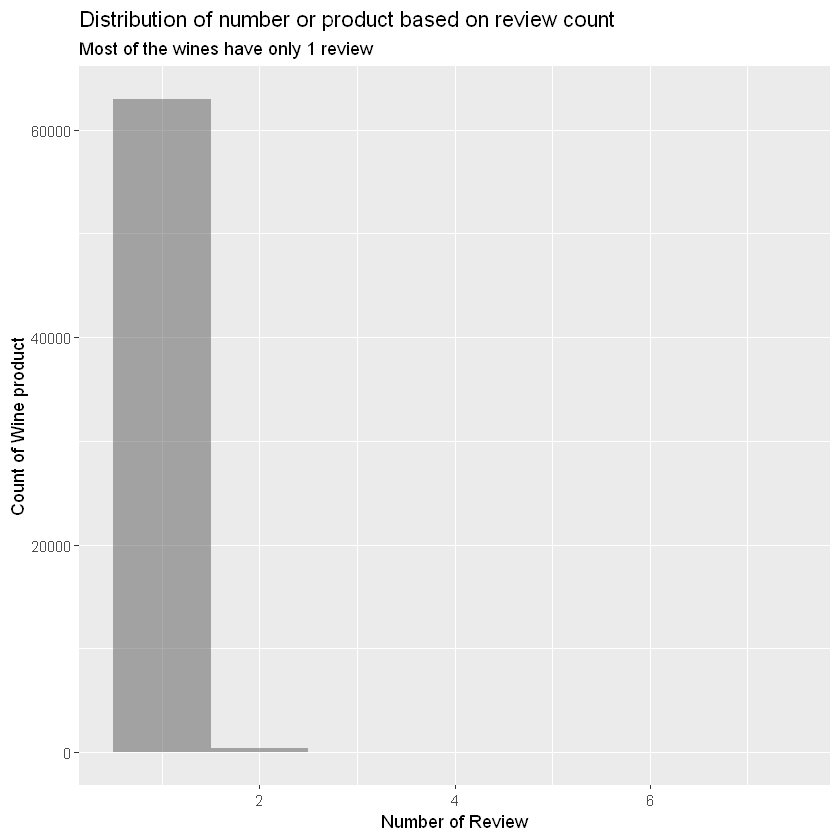

In [161]:
ggplot(wineprod, aes(Rcount)) + geom_histogram(binwidth = 1, alpha = 0.5, position = 'identity') +
labs( x = "Number of Review",
     y = "Count of Wine product", 
     title = 'Distribution of number or product based on review count',
    subtitle = 'Most of the wines have only 1 review')

In [162]:
# Do tasters who review more wine tend to give different scores?
wine4 <- merge(wine_clean, taster[c('tasterID', 'Rcount')], by.x = 'tasterID', by.y = 'tasterID', all.x = T)
wine4 <- merge(wine4, wineprod[c('wineID', 'average')], by.x = 'wineID', by.y = 'wineID', all.x = T)

avgpoint <- round(mean(wine4$points),2)

In [163]:
avgpoint

[1] 88.84

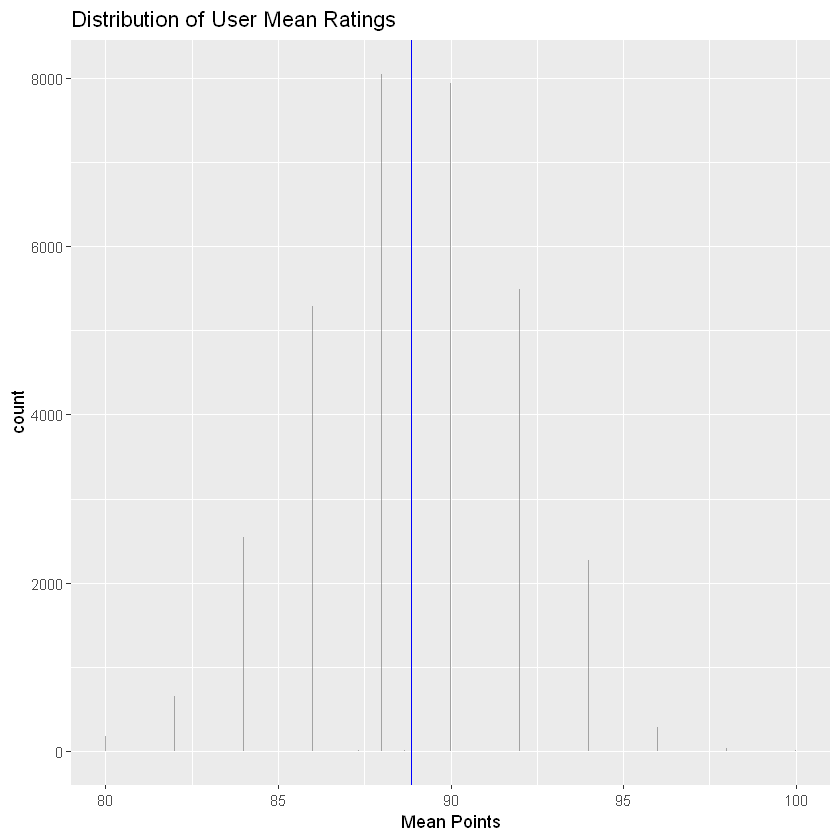

In [164]:
#distribution of wine mean point
ggplot(wine4, aes(x = average)) +
    geom_histogram(binwidth = 0.01, alpha = .5, position = 'identity') +
    geom_vline(aes(xintercept = mean(points)), color = 'blue') +
    labs(x = "Mean Points", y = "count", title = "Distribution of User Mean Ratings")

In [165]:
# Differences among reviewers
wine4$Rcut <- cut(wine4$Rcount, c(0,50,100,150,200,250,500,750,1000,1250,1500,1750,2000, 3000, 4000, 5000, 6000, 7000, 10000, 15000))

In [166]:
statbox <- ungroup(wine4) %>%
    group_by(Rcut) %>%
    summarize(avgpoint = round(mean(points, na.rm = T),2),
             medpoint = median(points),
             sdpoint = round(sd(points, na.rm = T),2))

In [167]:
colnames(statbox) <- c("Review Count", "Average Score", "Median Score", "Std Deviation")

Chart below shows that tasters tend to be fairly consistent despite tasters' experience.
Scores tend to be about the same and all above 80s. 

In [168]:
statbox

Review Count,Average Score,Median Score,Std Deviation
<fct>,<dbl>,<dbl>,<dbl>
"(0,50]",87.06,87,2.46
"(50,100]",86.65,87,1.97
"(250,500]",87.94,88,2.52
"(500,750]",86.60,87,2.47
"(1e+03,1.25e+03]",87.80,88,2.53
"(2e+03,3e+03]",90.08,90,2.70
"(3e+03,4e+03]",88.89,89,2.71
"(4e+03,5e+03]",90.52,91,2.48
"(6e+03,7e+03]",89.38,89,2.85


In [169]:
# check for duplicate title for same taster
wine_clean %>%
    arrange(title, taster_name) %>%
    group_by(taster_name, title) %>%
    filter(n() >1)

country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,tasterID,wineID
<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<int>,<int>
Spain,"Spiced apple and toast aromas are clean and direct. On the palate, it's malic and citric, with lime and white grapefruit flavors. A citrusy finish with a note of salt maintains freshness.",Brut,87,16,Catalonia,Cava,NA,Michael Schachner,@wineschach,1+1=3 NV Brut Sparkling (Cava),Sparkling Blend,1+1=3,13,49
Spain,"Dusty notes of citrus fruits are mild but friendly. This Cava is zesty, fresh and simple as a whole, with lime, clover and grassy flavors. Freshness is the overriding theme, while the finish tastes of apple and lime.",Brut,87,16,Catalonia,Cava,NA,Michael Schachner,@wineschach,1+1=3 NV Brut Sparkling (Cava),Sparkling Blend,1+1=3,13,49
France,"Bone dry and crisp, this is also has fruitiness from the ripeness of the grapes, giving impressively rich apple and pear flavors. Of course, these are cut by tight acidity and intense citrus, leaving a tight, steely aftertaste.",Dosage ZÃ©ro Brut Nature,89,49,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Dosage ZÃ©ro Brut Nature (Champagne),Champagne Blend,A.R. LenobleÂ,16,221
France,"This tight crisp wine delivers citrus and sliced apple fruits. There is a brisk mousse that gives the wine quite a bite of acidity. All the elements point in the direction of food for this Champagne. Like many bone-dry Champagnes, this bottling needs to age, so drink from 2018.",Dosage ZÃ©ro Brut Nature,90,49,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Dosage ZÃ©ro Brut Nature (Champagne),Champagne Blend,A.R. LenobleÂ,16,221
France,"With zero grams of residual sugar, this is wine is as dry as it gets, relying on the ripe fruit to balance the intense acidity. Crisp apple and tight acidity dominate. Like many zero-dosage Champagnes it needs to age, so hold this bottle for two years.",Dosage ZÃ©ro Brut Nature,90,49,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Dosage ZÃ©ro Brut Nature (Champagne),Champagne Blend,A.R. LenobleÂ,16,221
France,"The wine comes from the Grand Cru village of Chouilly in the Chardonnay vineyards of the CÃ´te des Blancs. It is crisp, mineral textured and still developing. Bright acidity and lemon-zest flavors give this wine its lively and also full-bodied character. Drink from 2018.",Grand Cru Blanc de Blancs Chouilly Brut,92,54,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Grand Cru Blanc de Blancs Chouilly Brut Chardonnay (Champagne),Chardonnay,A.R. LenobleÂ,16,222
France,"This is a very lively wine with a creamy mousse. The wine is towards dry, bringing out great white and citrus fruit flavors with a burst of tangy acidity. It comes from the village of Chouilly in the CÃ´te des Blancs, which gives the wine a tight mineral texture at the end.",Grand Cru Blanc de Blancs Chouilly Brut,91,54,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Grand Cru Blanc de Blancs Chouilly Brut Chardonnay (Champagne),Chardonnay,A.R. LenobleÂ,16,222
France,"A quarter of this nonvintage blend was vinified in wood. That adds some extra richness to the already ripe fruit. Based on the 2013 vintage, the wine is full of pear, crisp apple and hints of apricot. Drink now.",Intense Brut,90,45,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Intense Brut (Champagne),Champagne Blend,A.R. LenobleÂ,16,223
France,"With vineyards in the Marne Valley, this Champagne house has produced a ripe, soft style. Based on grapes from the 2011 harvest, it is still young, although the acidity is softening to bring in ripe apple and green-plum flavors. An underlying ripe fruit character makes it extra attractive.",Intense Brut,89,45,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Intense Brut (Champagne),Champagne Blend,A.R. LenobleÂ,16,223


In [170]:
wine_clean[wine_clean$title == 'Domaines Devillard 2011 ChÃ¢teau de Chamirey  (Mercurey)',]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,tasterID,wineID
,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<int>,<int>
1221,France,"Full-bodied wine with ripe pear and red apple flavors, laced with delicate acidity. It's an elegant wine, a fine balance with a more mineral, tight texture as a counterpoint. Drink from 2014.",ChÃ¢teau de Chamirey,88,35,Burgundy,Mercurey,NA,Roger Voss,@vossroger,Domaines Devillard 2011 ChÃ¢teau de Chamirey (Mercurey),Chardonnay,Domaines Devillard,16,20760
1222,France,"A smooth and rounded wine, its ripe plum and blueberry flavors well integrated into the soft tannins and sweet acidity. Drinkable now, but worth waiting for two more years.",ChÃ¢teau de Chamirey,88,35,Burgundy,Mercurey,NA,Roger Voss,@vossroger,Domaines Devillard 2011 ChÃ¢teau de Chamirey (Mercurey),Pinot Noir,Domaines Devillard,16,20760


## Collaborative Filtering

### Item Based Collaborative Filtering

In [171]:
# will be using taster_twitter_handler as userid, designation as item, points as the rating
wine_cf <- wine_clean[,c('tasterID', 'wineID', 'points')]

In [172]:
head(wine_cf)

tasterID,wineID,points
<int>,<int>,<int>
16,47571,87
1,53884,87
15,54762,87
13,55164,87
10,56091,87
2,28801,87


In [173]:
wine_cf$tasterID <- as.factor(wine_cf$tasterID)
wine_cf$wineID <- as.factor(wine_cf$wineID)
wine_cf$points <- as.numeric(wine_cf$points)

In [174]:
wine_cf_matrix <- dcast(wine_cf, tasterID ~ wineID, fun.aggregate = mean,value.var = 'points',fill=0)

In [175]:
wine_cf_matrix[1:5, 1:5]

tasterID,1,2,3,4
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0


In [176]:
rownames(wine_cf_matrix) = wine_cf_matrix[,1]

In [177]:
wine_cf_matrix[,1] = NULL

In [178]:
dim(wine_cf_matrix)

[1]    19 63452

In [179]:
wine_cf_matrix[1:5, 1:5]

1,2,3,4,5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0


In [64]:
#wine_cf[(wine_cf$taster_name == 'Michael Schachner'& wine_cf$designation == '347 Vineyards'),]

In [180]:
wine_cf_matrix[1:19,1000:1100]

1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,88,92
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Content Based Recommender

In [181]:
wine_clean$description[1:5]

[1] "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016."                                  
[2] "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish."                                                              
[3] "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew."            
[4] "Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby."
[5] "Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins."

In [68]:
mystopwords = c(stopwords('english'), 'the', 'and', 'wine')

In [182]:
desc_corpus <- VCorpus(VectorSource(wine_clean$description))

In [183]:
desc_corpus <- tm_map(desc_corpus, content_transformer(tolower))

In [184]:
desc_corpus <- tm_map(desc_corpus, removeNumbers)

In [185]:
desc_corpus <- tm_map(desc_corpus, removeWords, c(stopwords('english'),'the', 'and', 'wine'))
desc_corpus <- tm_map(desc_corpus, removePunctuation)
desc_corpus <- tm_map(desc_corpus, stemDocument)
desc_corpus <- tm_map(desc_corpus, removeWords, stopwords('english'))
desc_corpus <- tm_map(desc_corpus, stripWhitespace)

In [186]:
for(i in 1:6){
    print(desc_corpus[[i]][1])
}

$content
[1] "ripe fruiti smooth still structur firm tannin fill juici red berri fruit freshen acid alreadi drinkabl although will certain better"

$content
[1] "pineappl rind lemon pith orang blossom start aroma palat bit opul note honeydrizzl guava mango give way slight astring semidri finish"

$content
[1] "much like regular bottl come across rather rough tannic rustic earthi herbal characterist nonetheless think pleasant unfussi countri good companion hearti winter stew"

$content
[1] "blackberri raspberri aroma show typic navarran whiff green herb case horseradish mouth fair full bodi tomatoey acid spici herbal flavor complement dark plum fruit finish fresh grabbi"

$content
[1] "bright inform red open aroma candi berri white pepper savori herb carri palat balanc fresh acid soft tannin"

$content
[1] "savori dri thyme note accent sunnier flavor preserv peach brisk dri fruiti fresh eleg spright footprint"



In [187]:
desc_dtm <- DocumentTermMatrix(desc_corpus, control = list(weighting = weightTfIdf))

In [188]:
desc_dtm

<<DocumentTermMatrix (documents: 64050, terms: 24170)>>
Non-/sparse entries: 1555765/1546532735
Sparsity           : 100%
Maximal term length: 47
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

### Improve Sparsity

In [189]:
desc_dtm = removeSparseTerms(desc_dtm, 0.90)

In [190]:
desc_dtm

<<DocumentTermMatrix (documents: 64050, terms: 29)>>
Non-/sparse entries: 377821/1479629
Sparsity           : 80%
Maximal term length: 6
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

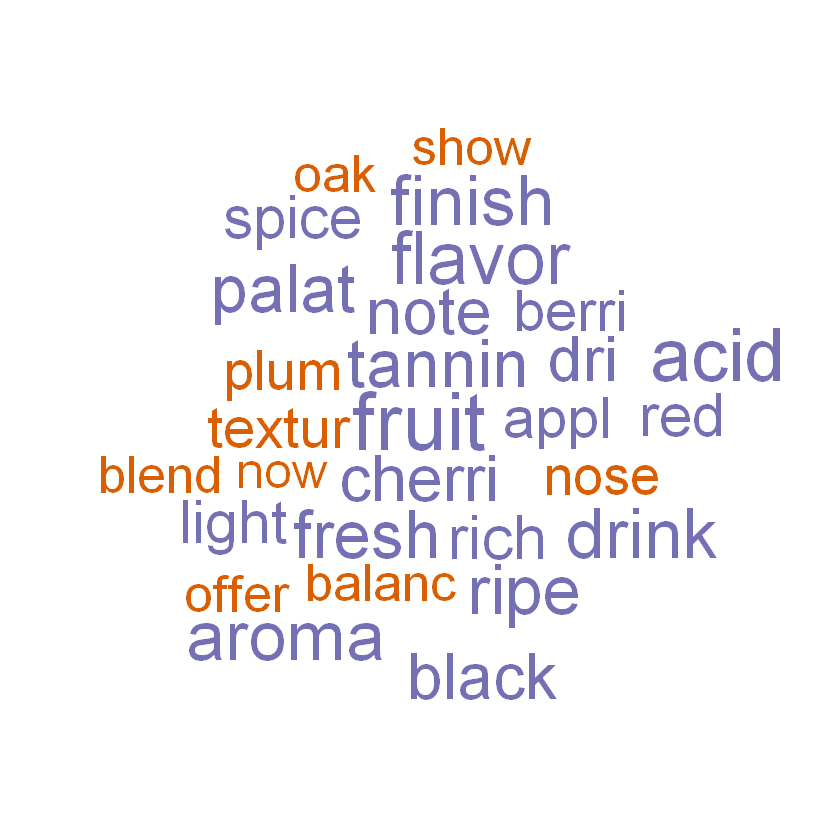

In [191]:
freq = data.frame(sort(colSums(as.matrix(desc_dtm)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

## Compute Cosine similarity

In [192]:
require('slam')

In [80]:
sim_mat_cos <- crossprod_simple_triplet_matrix(t(desc_dtm))/(sqrt(col_sums(t(desc_dtm)^2) %*% t(col_sums(t(desc_dtm)^2))))

ERROR: Error: cannot allocate vector of size 125.9 Gb
